# Classification - Breast Cancer Wisconsin (Diagnostic)

[UCI - Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_path = 'drive/MyDrive/TensorFlow-Data'

In [3]:
file_path = folder_path + '/cancer_classification.csv'

df = pd.read_csv(file_path)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Check whether it is well balanced data or not


In [10]:
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

In [13]:
357/(357+212), 212/(357+212)

(0.6274165202108963, 0.37258347978910367)

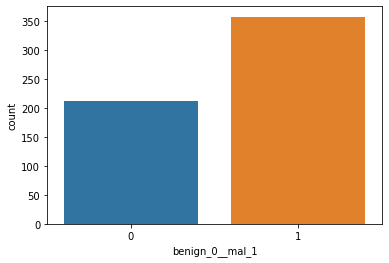

In [14]:
sns.countplot(x='benign_0__mal_1', data=df);

Although cases with 1 is more than 0 cases, the difference is not that extreme. 

## Check correlation

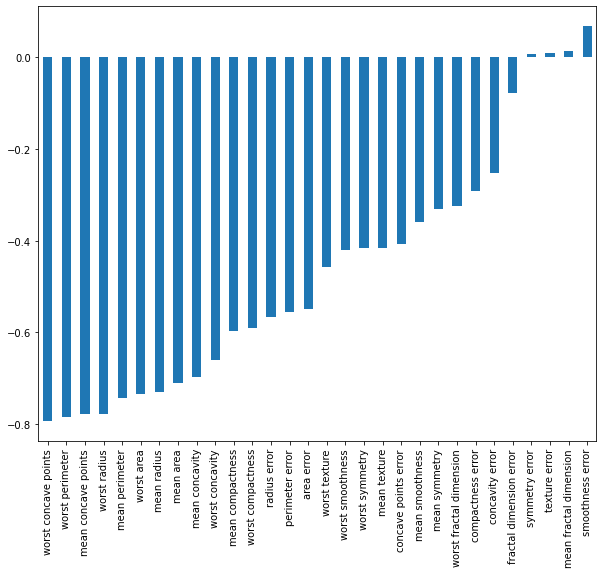

In [18]:
# check correlation
plt.figure(figsize=(10, 8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

We can see that there are a lot of features which are strongly and negatively correlated wth label. So our model generally should do well picking up those patterns.


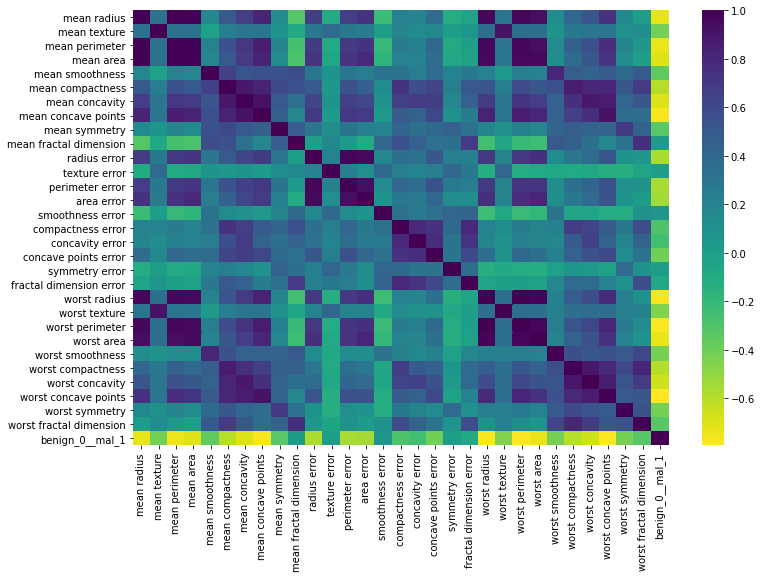

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis_r');

# Train Test Split


In [25]:
# separate features and labels (in numpy arrray format)
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Scaling Data

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

## For a binary classification problem
`model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])`

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
X.shape

# we have 30 features

(569, 30)

## Example One: Choosing too many epochs and overfitting!

In [38]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

# As this is BINARY CLASSIFICATOIN problem, we want our last layer to be using Sigmoid 
model.add(Dense(units=1, activation='sigmoid')) # output layer with Sigmoid Activation Function


model.compile(optimizer='adam', loss='binary_crossentropy')

## Training the Model


In [39]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 21ms/step - loss: 0.6788 - val_loss: 0.6332
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6195 - val_loss: 0.5743
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5508 - val_loss: 0.5067
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4904 - val_loss: 0.4500
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4279 - val_loss: 0.3969
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3899 - val_loss: 0.3529
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3531 - val_loss: 0.3120
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3182 - val_loss: 0.2759
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2785 - val_loss: 0.2475
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2684 - val_loss: 0.2253
Epoch 11

## Check history of Training

In [42]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.662070,0.633214
1,0.606209,0.574316
2,0.541479,0.506659
3,0.478809,0.450043
4,0.427443,0.396876


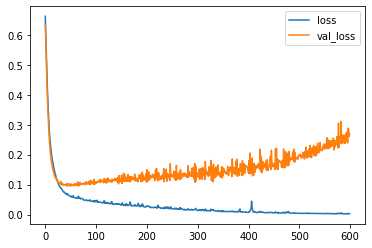

In [43]:
losses.plot();

We can see from the chart that our model is definitely OVERFITTING because `val_loss` (orange line) suddenly spikes up after a certain epochs.

val_loss is getting wrose and wrose after a certain point in time.

To avoid this, we can put Early Stopping.

# Model Building (with Early Stopping)


## Example Two: Early Stopping

In [44]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

# As this is BINARY CLASSIFICATOIN problem, we want our last layer to be using Sigmoid 
model.add(Dense(units=1, activation='sigmoid')) # output layer with Sigmoid Activation Function

model.compile(optimizer='adam', loss='binary_crossentropy')

## Early stopping

Stop training when a monitored quantity has stopped improving.

Parameters:

* `monitor`: Quantity to be monitored.
* `min_delta`: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
* `patience`: Number of epochs with no improvement after which training will be stopped.
* `verbose`: verbosity mode.
* `mode`: One of `{"auto", "min", "max"}`. 
  * In `min` mode, training will stop when the quantity monitored has stopped decreasing; 
  * in `max` mode it will stop when the quantitymonitored has stopped increasing; 
  * in `auto`mode, the direction is automatically inferred from the name of the monitored quantity.

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
# In our case, we want to check orange line 'val_loss' whether the `loss` is getting smaller and smaller or not
# As we are watching `loss`, the smaller the value => the better the model. So we will put mode as 'min'.
# For cases like watching `accuracy` which we want to maximize , we want to use 'max'.

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

## Model Training with Early Stopping

In [48]:
model.fit(x=X_train, 
                y=y_train, 
                epochs=600, 
                validation_data=(X_test, y_test), 
                callbacks=[early_stop], 
                verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6647 - val_loss: 0.6276
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6296 - val_loss: 0.5839
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5838 - val_loss: 0.5387
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5364 - val_loss: 0.4895
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4966 - val_loss: 0.4377
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4515 - val_loss: 0.3896
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3905 - val_loss: 0.3470
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3597 - val_loss: 0.3100
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3271 - val_loss: 0.2845
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3000 - val_loss: 0.2583
Epoch 11

Now we can see that because of Early Stopping, the model traning got stopped once there is no improvement in training (after 87 epoch).


## Check history of Training (with Early Stopping)

In [53]:
model_loss = pd.DataFrame(model.history.history)

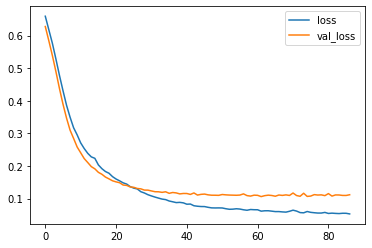

In [54]:
model_loss.plot();

# Model Building (with Adding in DropOut Layers)
* Turn off % of neurons randomly
* `rate`: 0 - 1 (percentage of neurons to be turned off randomly while training on each epoch)

## Example Three: Adding in DropOut Layers

In [55]:
from tensorflow.keras.layers import Dropout

In [56]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(rate=0.5)) # meaning that 50% of neurons will be RANDOMLY turned off per each epoch training

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(rate=0.5))

# BINARY CLASSIFICATOIN
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [57]:
# We will use dropout in combination with earlystop callback. This will help us the model from overfitting
model.fit(x=X_train, 
                y=y_train, 
                epochs=600, 
                validation_data=(X_test, y_test), 
                callbacks=[early_stop], 
                verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7288 - val_loss: 0.6840
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6861 - val_loss: 0.6673
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6613 - val_loss: 0.6492
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6427 - val_loss: 0.6340
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6301 - val_loss: 0.6183
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6176 - val_loss: 0.6012
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6108 - val_loss: 0.5838
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6022 - val_loss: 0.5580
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5814 - val_loss: 0.5265
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5538 - val_loss: 0.5016
Epoch 11

## Check history of losses

In [58]:
model_loss = pd.DataFrame(model.history.history)

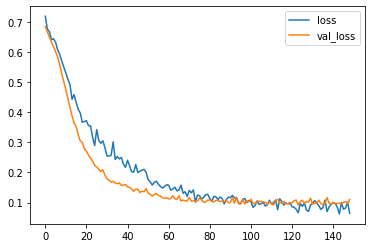

In [59]:
model_loss.plot();

We can see that both `loss` and `val_loss` are decreasing almost together and flattening out. This is a great improvment from our original model.


# Model Evaluation

In [123]:
# for keras, the way it use BINARY CLASSFICATION prediction is as follow

predictions = (model.predict(X_test) > 0.2).astype("int32")

In [124]:
predictions[:5]

array([[1],
       [1],
       [1],
       [0],
       [1]], dtype=int32)

In [125]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [126]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [127]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 1 87]]


There are about 2 points which are misclassified.